# **40 Paper-scissors-stone. . . and jelly babies!**

---

*   Four children play a long sequence of paper-scissors-stone games in pairs.*

*   They divide up 40 jelly babies, starting with 10 each.

*   The eldest child begins the sequence by choosing an opponent at random, then the next eldest chooses at random, and so on, to complete the round of 4 games.

*   If a child wins a game, the loser gives the winner a jelly
baby.

*   If the game is a draw no sweets are exchanged.

*   In each game, there is an equal probability of winning, losing or drawing.

---

There are two versions of the rules:

(a)   If a child, at any time, has no sweets, they are eliminated.

(b)   If a child with no sweets plays a child with sweets, they automatically win.

---

Carry out a computer simulation of the game.

For case (a) find out how long (how many rounds), on average, the game lasts. How does the duration of the game vary with the number of children and the number of sweets?

For case (b) find out the fraction of time the oldest child has no sweets, and the fraction of time when they have all the sweets. Can you explain these values mathematically?


---

Code for case (a) varying initial conditions


Number of Children: 2
Number of Sweets per Child: [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
Average Round Count: [3.161, 6.906, 12.085, 19.258, 26.557, 36.956, 46.446, 58.829, 74.513, 91.905, 106.42, 125.765, 149.21, 164.59, 194.098, 212.256, 239.711, 272.144, 297.289]
Number of Children: 3
Number of Sweets per Child: [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
Average Round Count: [8.204, 17.872, 31.87, 49.115, 74.206, 97.489, 127.838, 162.762, 195.788, 247.196, 293.2, 343.328, 403.774, 444.165, 509.373, 561.252, 641.625, 707.726, 801.446]
Number of Children: 4
Number of Sweets per Child: [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
Average Round Count: [15.301, 33.171, 58.607, 95.59, 138.586, 179.983, 236.875, 300.455, 366.028, 438.579, 551.674, 626.346, 729.885, 843.197, 945.248, 1085.043, 1206.639, 1352.254, 1501.381]
Number of Children: 5
Number of Sweets per Child: [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,

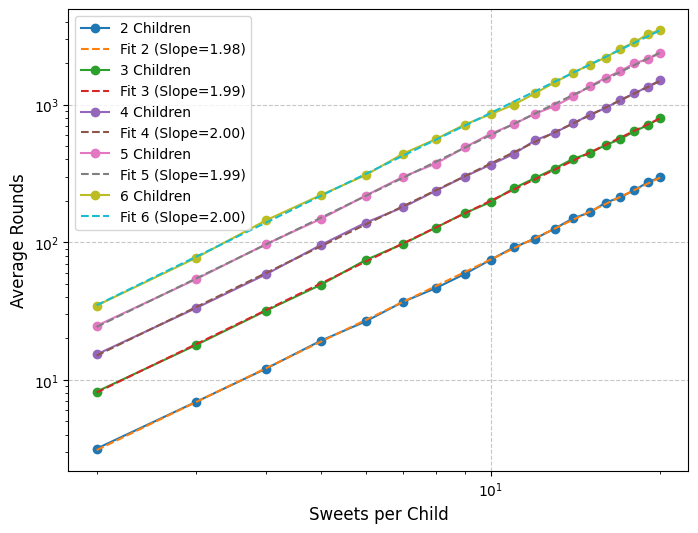

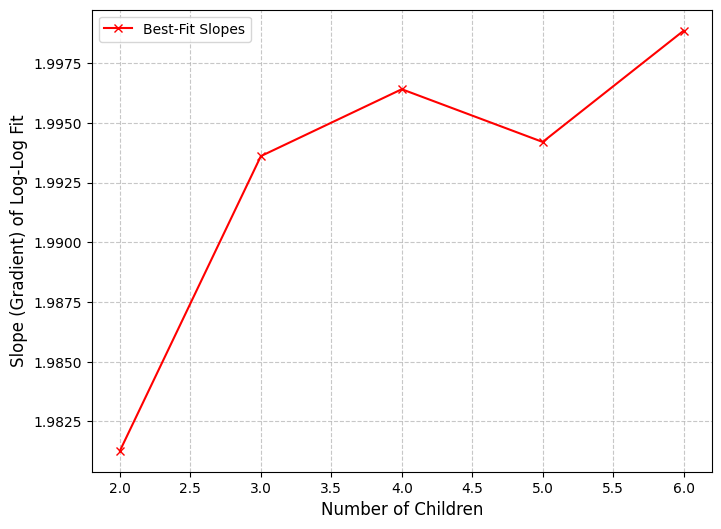

In [ ]:
#Imports
import random as random
import numpy as np
import matplotlib.pyplot as plt
import concurrent.futures

#Children class
class childrenClass:
  def __init__(self, name, jellyBabyCount):
    self.Name = name
    self.JellyBabyCount = jellyBabyCount

  def __repr__(self):
    return (f"childrenClass(child={self.Name}, count={self.JellyBabyCount})")

  @property
  def name(self):
    return self.Name

  @name.setter
  def name(self, value):
    self.Name = value

  @property
  def jellyBabyCount(self):
    return self.JellyBabyCount

  @jellyBabyCount.setter
  def jellyBabyCount(self, value):
    self.JellyBabyCount = value

#Playing a game
def playGame(child, opponent):

  #Getting outcome: -1 = lose, 0 = draw and 1 = win
  outcome = random.choices([-1, 0, 1], weights = [1/3, 1/3, 1/3], k = 1)[0]

  #Determining outcome and updating accordingly
  if outcome == 1 and opponent.jellyBabyCount > 0:
    child.jellyBabyCount += 1
    opponent.jellyBabyCount -= 1
  elif outcome == -1 and child.jellyBabyCount > 0:
    child.jellyBabyCount -= 1
    opponent.jellyBabyCount += 1

#Playing a round of games
def playRound(activeChildren):

  #Copying active children list
  playingList = activeChildren.copy()

  for player in playingList:

    #Getting opponent
    opponentList = [child for child in activeChildren if child != player]
    opponent = random.choice(opponentList)

    #Skipping any children who have no jelly babies
    if player.jellyBabyCount == 0 or opponent.jellyBabyCount == 0:
      continue

    #Playing a game
    playGame(player, opponent)

    #If a child has no jelly babies then removed
    activeChildren = [child for child in activeChildren if child.jellyBabyCount > 0]

    #Stopping when we have a winner
    if len(activeChildren) < 2:
      return activeChildren

  return activeChildren

def simulation(childrenNames, sweetsPerChild, numSims):

  #Declaring variables
  roundsCount = []
  activeChildren = []

  for _ in range(numSims):

    #Setting up childrenList
    activeChildren = [childrenClass(child, sweetsPerChild) for child in childrenNames]

    rounds = 0

    while len(activeChildren) > 1:

      #Playing a round
      activeChildren = playRound(activeChildren)
      rounds += 1

    #Adding round to the list
    roundsCount.append(rounds)

  return roundsCount

def runSimulationWrapper(args):

  #Setting seed
  seed = 20
  random.seed(seed)
  np.random.seed(seed)

  return runSimulation(*args)

#Function to run a single simulation
def runSimulation(childNum, sweetsPerChild, numSims):

  #Making a children names list and setting seed
  childrenNames = [f'child{i}' for i in range(childNum)]

  #Calculating average rounds from simulation
  avgRounds = np.average(simulation(childrenNames, sweetsPerChild, numSims))
  return avgRounds, childNum, sweetsPerChild

#Multiprocessing execution
def parallelExecution(numChildren, minSweets, maxSweets, numSims, max_workers=None):

  #Declaring variables
  roundsData = []

  #Preparing input arguments
  inputArgs = [(childNum, sweetsPerChild, numSims) for childNum in range(2, numChildren + 1) for sweetsPerChild in range(minSweets, maxSweets + 1)]

  #Using ProcessPoolExecutor to parallelise simulation runs
  with concurrent.futures.ProcessPoolExecutor(max_workers=max_workers) as executor:
    results = executor.map(runSimulationWrapper, inputArgs)

  #Storing results
  roundsData.extend(results)

  return roundsData

#Declaring variables
numSims = 1000
roundsData = []
numChildren = 6
gradients = []

#Number of cores to use, none = all
maxWorkers = None

#Setting minimums and maximums
minSweets = 2
maxSweets = 20

#Running the simulations in parallel
roundsData = parallelExecution(numChildren, minSweets, maxSweets, numSims, maxWorkers)

#Extracting unique child counts
childCounts = sorted(set(row[1] for row in roundsData))

#Plotting average rounds vs number of initial sweets for different children numbers
plt.figure(figsize=(8, 6))

for numChildren in childCounts:

  #Extracting (sweets, avgRounds) for a given child count
  roundsForChildren = [(sweets, avgRounds) for avgRounds, children, sweets in roundsData if children == numChildren]
  roundsForChildren.sort()

  #Separating sweets and average rounds
  sweetsValues, avgRoundsValues = zip(*roundsForChildren)

  #Printing values
  print(f'Number of Children: {numChildren}')
  print(f'Number of Sweets per Child: {list(sweetsValues)}')
  print(f'Average Round Count: {list(avgRoundsValues)}')

  #Plotting line
  plt.loglog(sweetsValues, avgRoundsValues, marker="o", label=f"{numChildren} Children")

  #Converting to log scale
  lnSweets = np.log(sweetsValues)
  lnAvgRounds = np.log(avgRoundsValues)

  #Computing best-fit slope (gradient) using linear regression
  slope, intercept = np.polyfit(lnSweets, lnAvgRounds, 1)

  #Storing results
  gradients.append((numChildren, slope))

  #Plotting best-fit line on log-log scale
  bestFitLine = np.exp(intercept) * np.array(sweetsValues) ** slope
  plt.loglog(sweetsValues, bestFitLine, linestyle="--", label=f"Fit {numChildren} (Slope={slope:.2f})")

plt.xlabel("Sweets per Child", fontsize=12)
plt.ylabel("Average Rounds", fontsize=12)
plt.legend()
plt.grid(linestyle='--', alpha=0.7)
plt.savefig('aVary.pdf')

#Plotting the best-fit slopes (gradients) for each child count
plt.figure(figsize=(8, 6))
childCountsSorted, slopes = zip(*gradients)
plt.plot(childCountsSorted, slopes, marker="x", linestyle="-", color="red", label="Best-Fit Slopes")
plt.xlabel("Number of Children", fontsize=12)
plt.ylabel("Slope (Gradient) of Log-Log Fit", fontsize=12)
plt.legend()
plt.grid(linestyle='--', alpha=0.7)
plt.savefig('aVaryGradient.pdf')

#Printing Gradients
print(gradients)

---

Code for case (b) varying initial conditions

Number of Children: 2
Number of Sweets per Child: 9
Time Empty: 0.018826
Time Full: 0.0191
Number of Children: 3
Number of Sweets per Child: 9
Time Empty: 0.024961
Time Full: 0.000289
Number of Children: 4
Number of Sweets per Child: 9
Time Empty: 0.029388
Time Full: 6e-06
Number of Children: 5
Number of Sweets per Child: 9
Time Empty: 0.029654
Time Full: 0.0
Number of Children: 2
Number of Sweets per Child: 10
Time Empty: 0.016928
Time Full: 0.017205
Number of Children: 3
Number of Sweets per Child: 10
Time Empty: 0.022505
Time Full: 0.000231
Number of Children: 4
Number of Sweets per Child: 10
Time Empty: 0.026383
Time Full: 3e-06
Number of Children: 5
Number of Sweets per Child: 10
Time Empty: 0.026421
Time Full: 0.0


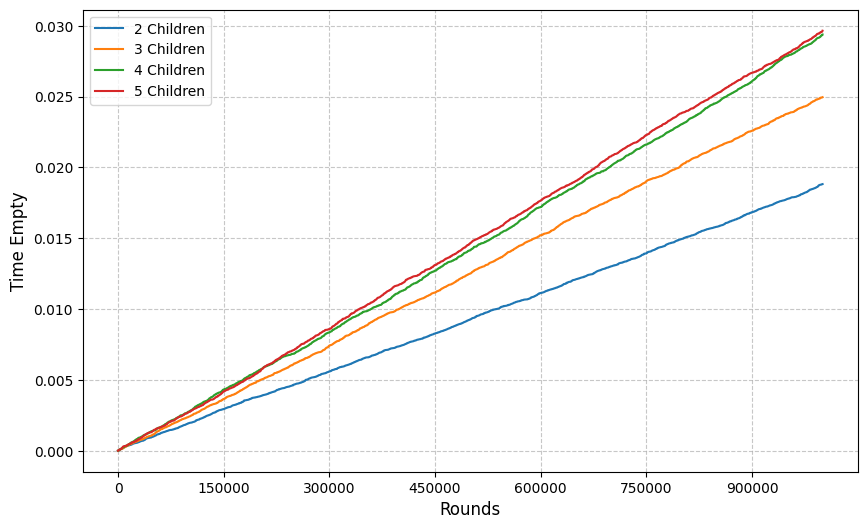

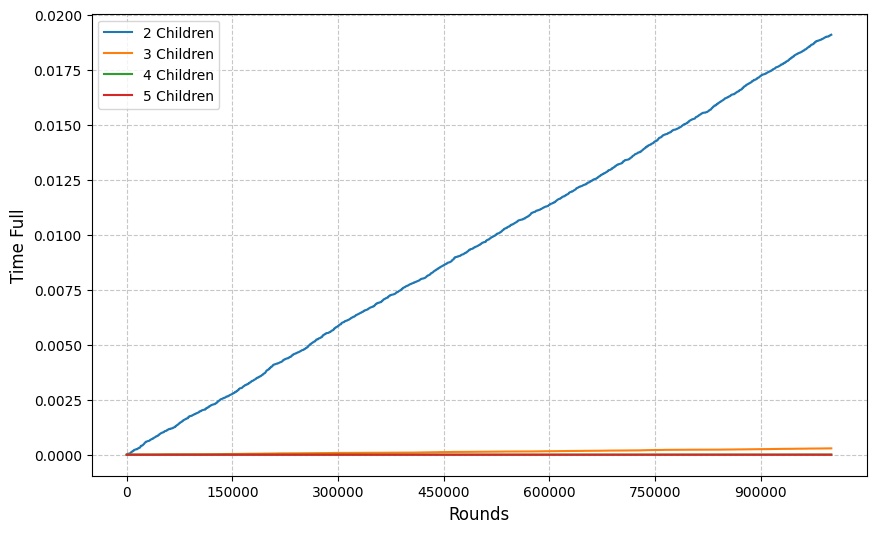

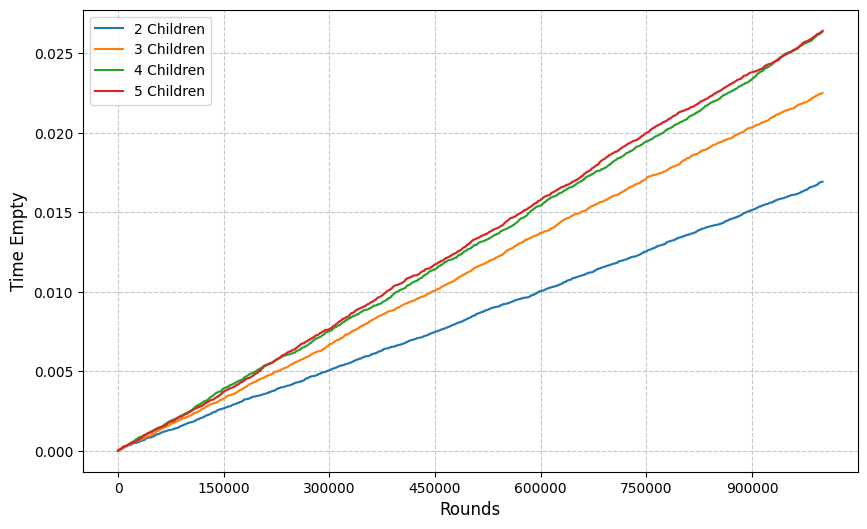

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


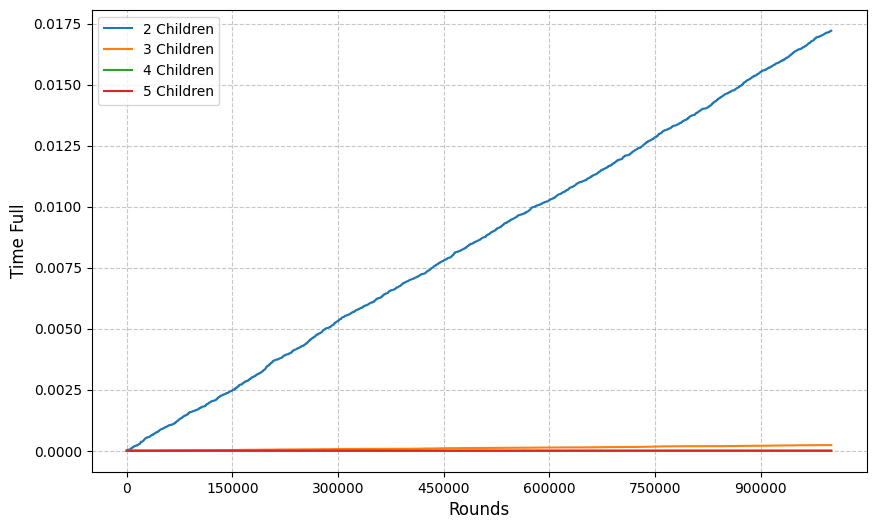

In [ ]:
#Imports
import random as random
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

#Children class
class childrenClass:
  def __init__(self, name, jellyBabyCount):
    self.Name = name
    self.JellyBabyCount = jellyBabyCount

  def __repr__(self):
    return (f"childrenClass(child={self.Name}, count={self.JellyBabyCount})")

  @property
  def name(self):
    return self.Name

  @name.setter
  def name(self, value):
    self.Name = value

  @property
  def jellyBabyCount(self):
    return self.JellyBabyCount

  @jellyBabyCount.setter
  def jellyBabyCount(self, value):
    self.JellyBabyCount = value

#Playing a game
def playGame(child, opponent):

  #Getting outcome: -1 = lose, 0 = draw and 1 = win
  outcome = random.choices([-1, 0, 1], weights = [1/3, 1/3, 1/3], k = 1)[0]

  #Determining outcome and updating accordingly
  if child.jellyBabyCount == 0 and opponent.jellyBabyCount == 0:
    pass
  elif child.jellyBabyCount == 0 or (outcome == 1 and opponent.jellyBabyCount > 0):
    child.jellyBabyCount += 1
    opponent.jellyBabyCount -= 1
  elif opponent.jellyBabyCount == 0 or (outcome == -1 and child.jellyBabyCount > 0):
    child.jellyBabyCount -= 1
    opponent.jellyBabyCount += 1

#Playing a round of games
def playRound(activeChildren, totalJB, roundsEmpty, roundsFull, rounds):

  #Copying active children list
  playerList = activeChildren.copy()

  for player in playerList:

    #Getting opponent
    opponentList = [child for child in activeChildren if child != player]
    opponent = random.choice(opponentList)

    #Playing a game
    playGame(player, opponent)

    #Checks if eldest child has no sweets or all sweets
    if player.name == activeChildren[0].name and player.jellyBabyCount == 0:
      roundsEmpty[rounds] = 1
    elif player.name == activeChildren[0].name and player.jellyBabyCount == totalJB:
      roundsFull[rounds] = 1

  return activeChildren, roundsEmpty, roundsFull

def simulation(childrenNames, sweetsPerChild, totalJB, numRounds):

  #Declaring variables
  activeChildren = []
  rounds = 0
  empty = np.zeros(numRounds)
  full = np.zeros(numRounds)

  #Setting up childrenList
  activeChildren = [childrenClass(child, sweetsPerChild) for child in childrenNames]

  #Looping until max num of rounds has been played
  while rounds < numRounds:

    #Playing a round
    activeChildren, empty, full = playRound(activeChildren, totalJB, empty, full, rounds)

    if rounds > 0:
      empty[rounds] += empty[rounds - 1]
      full[rounds] += full[rounds - 1]

    rounds += 1

  return empty / numRounds, full / numRounds

#Declaring variables
childrenNames = [f'child{1}']
numChildren = 5
numRounds = 1000000
minSweets = 9
maxSweets = 10
roundsData = []
seed = 20

#Looping through varying number of sweets and varying number of children
for sweetsPerChild in range(minSweets, maxSweets + 1):

  #Declaring variables
  roundResultsEmpty = []
  roundResultsFull = []

  for numChild in range(2, numChildren + 1):

    #Generating the list of children names based on the number of children
    childrenNames = [f'child{i}' for i in range(1, numChild + 1)]

    #Setting seed
    random.seed(seed)
    np.random.seed(seed)

    #Calling simulation method and storing results
    empty, full = simulation(childrenNames, sweetsPerChild, numChild * sweetsPerChild, numRounds)

    #Storing normalised occurrences for plotting
    roundResultsEmpty.append(empty)
    roundResultsFull.append(full)

    #Printing values
    print(f'Number of Children: {numChild}')
    print(f'Number of Sweets per Child: {sweetsPerChild}')
    print(f'Time Empty: {empty[-1]}')
    print(f'Time Full: {full[-1]}')

  #Plotting graphs for current number of sweets
  plt.figure(figsize=(10, 6))

  #Plotting Empty graph for current number of sweets
  for numChild in range(2, numChildren + 1):
    plt.plot(range(1, numRounds + 1), roundResultsEmpty[numChild - 2], label=f"{numChild } Children")

  plt.xlabel("Rounds", fontsize=12)
  plt.ylabel("Time Empty", fontsize=12)
  plt.legend()
  plt.grid(linestyle='--', alpha=0.7)
  plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
  plt.savefig('bVaryFull.pdf')

  #Plotting Full graph for current number of sweets
  plt.figure(figsize=(10, 6))

  for numChild in range(2, numChildren + 1):
    plt.plot(range(1, numRounds + 1), roundResultsFull[numChild - 2], label=f"{numChild} Children")

  plt.xlabel("Rounds", fontsize=12)
  plt.ylabel("Time Full", fontsize=12)
  plt.legend()
  plt.grid(linestyle='--', alpha=0.7)
  plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
  plt.savefig('bVaryEmpty.pdf')

---
Code for case (a) without varying parameters.


In [ ]:
#Imports
import random as random
import numpy as np

#Setting seed
seed = 20
random.seed(seed)
np.random.seed(seed)

#Children class
class childrenClass:
  def __init__(self, name, jellyBabyCount):
    self.Name = name
    self.JellyBabyCount = jellyBabyCount

  def __repr__(self):
    return (f"childrenClass(child={self.Name}, count={self.JellyBabyCount})")

  @property
  def name(self):
    return self.Name

  @name.setter
  def name(self, value):
    self.Name = value

  @property
  def jellyBabyCount(self):
    return self.JellyBabyCount

  @jellyBabyCount.setter
  def jellyBabyCount(self, value):
    self.JellyBabyCount = value

#Playing a game
def playGame(child, opponent):

  #Getting outcome: -1 = lose, 0 = draw and 1 = win
  outcome = random.choices([-1, 0, 1], weights = [1/3, 1/3, 1/3], k = 1)[0]

  #Determining outcome and updating accordingly
  if outcome == 1 and opponent.jellyBabyCount > 0:
    child.jellyBabyCount += 1
    opponent.jellyBabyCount -= 1
  elif outcome == -1 and child.jellyBabyCount > 0:
    child.jellyBabyCount -= 1
    opponent.jellyBabyCount += 1

#Playing a round of games
def playRound(activeChildren):

  #Copying active children list
  playingList = activeChildren.copy()

  for player in playingList:

    #Getting opponent
    opponentList = [child for child in activeChildren if child != player]
    opponent = random.choice(opponentList)

    #Skipping any children who have no jelly babies
    if player.jellyBabyCount == 0 or opponent.jellyBabyCount == 0:
      continue

    #Playing a game
    playGame(player, opponent)

    #If a child has no jelly babies then removed
    activeChildren = [child for child in activeChildren if child.jellyBabyCount > 0]

    #Stopping when we have a winner
    if len(activeChildren) < 2:
      return activeChildren

  return activeChildren

def simulation(childrenNames, sweetsPerChild, numSims):

  #Declaring variables
  roundsCount = []
  activeChildren = []

  for _ in range(numSims):

    #Setting up childrenList
    activeChildren = [childrenClass(child, sweetsPerChild) for child in childrenNames]

    rounds = 0

    while len(activeChildren) > 1:

      #Playing a round
      activeChildren = playRound(activeChildren)
      rounds += 1

    roundsCount.append(rounds)

  return roundsCount

#Declaring variables
childrenNames = ['a', 'b', 'c', 'd']
numSims = 1000
roundsCount = []

numChildren = 4

sweetsPerChild = 10

roundsCount = simulation(childrenNames, sweetsPerChild, numSims)

print(min(roundsCount))
print(max(roundsCount))
print(np.average(roundsCount))

44
1561
366.028


---
Code for case (b) without varying parameters


26383.0
3.0


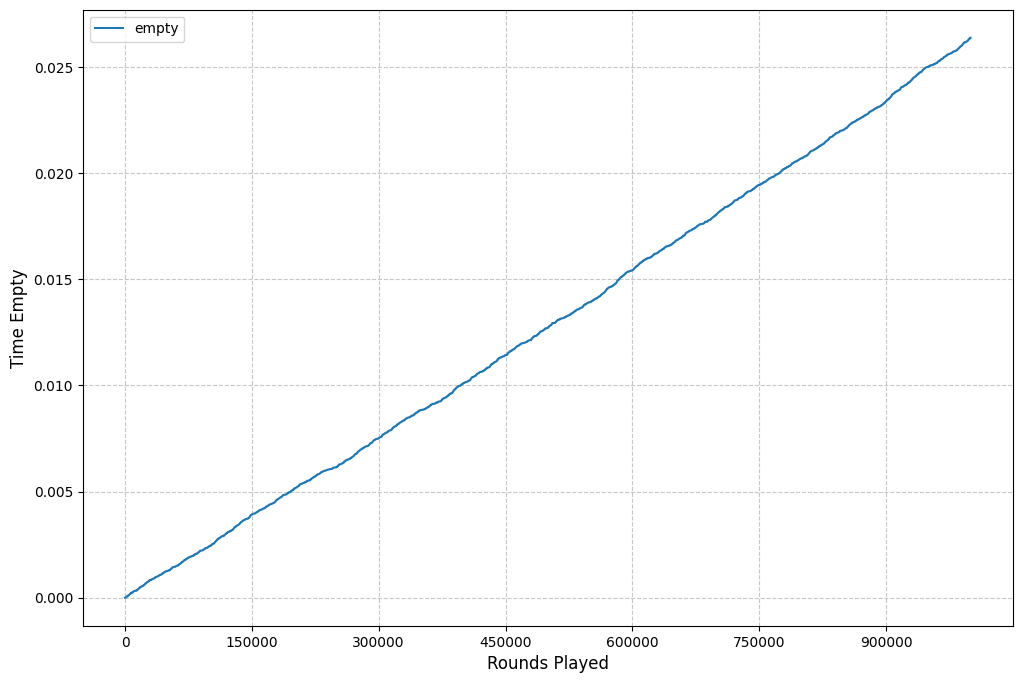

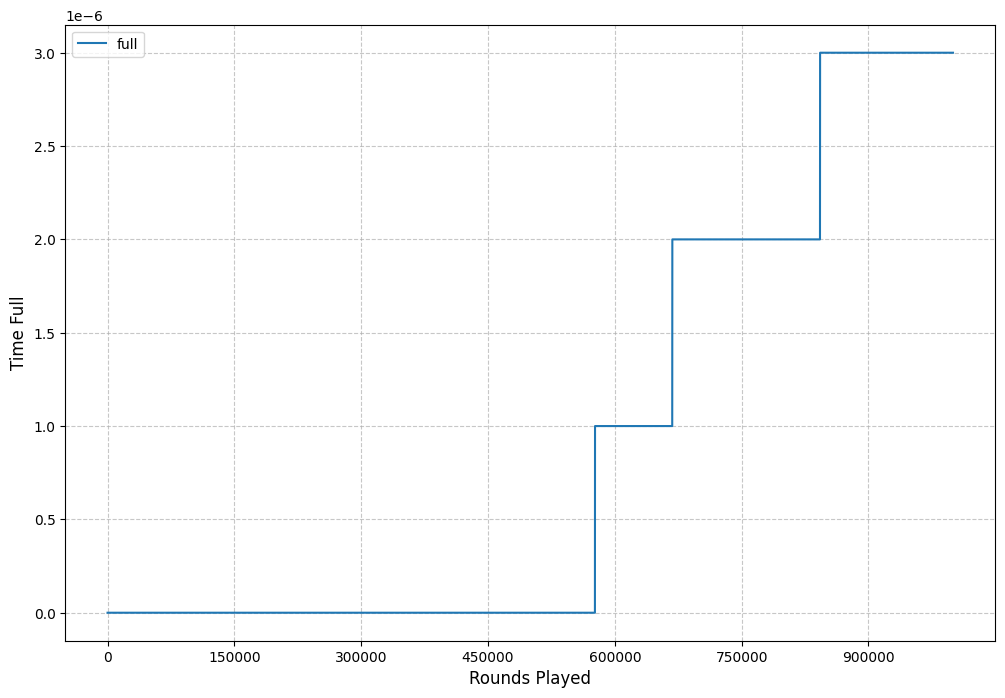

In [ ]:
#Imports
import random as random
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

#Children class
class childrenClass:
  def __init__(self, name, jellyBabyCount):
    self.Name = name
    self.JellyBabyCount = jellyBabyCount

  def __repr__(self):
    return (f"childrenClass(child={self.Name}, count={self.JellyBabyCount})")

  @property
  def name(self):
    return self.Name

  @name.setter
  def name(self, value):
    self.Name = value

  @property
  def jellyBabyCount(self):
    return self.JellyBabyCount

  @jellyBabyCount.setter
  def jellyBabyCount(self, value):
    self.JellyBabyCount = value

#Playing a game
def playGame(child, opponent):

  #Getting outcome: -1 = lose, 0 = draw and 1 = win
  outcome = random.choices([-1, 0, 1], weights = [1/3, 1/3, 1/3], k = 1)[0]

  #Determining outcome and updating accordingly
  if child.jellyBabyCount == 0 and opponent.jellyBabyCount == 0:
    pass
  elif child.jellyBabyCount == 0 or (outcome == 1 and opponent.jellyBabyCount > 0):
    child.jellyBabyCount += 1
    opponent.jellyBabyCount -= 1
  elif opponent.jellyBabyCount == 0 or (outcome == -1 and child.jellyBabyCount > 0):
    child.jellyBabyCount -= 1
    opponent.jellyBabyCount += 1

#Playing a round of games
def playRound(activeChildren, totalJB, roundsEmpty, roundsFull, rounds):

  #Copying active children list
  playerList = activeChildren.copy()

  for player in playerList:

    #Getting opponent
    opponentList = [child for child in activeChildren if child != player]
    opponent = random.choice(opponentList)

    #Playing a game
    playGame(player, opponent)

    #Checks if eldest child has no sweets or all sweets
    if player.name == activeChildren[0].name and player.jellyBabyCount == 0:
      roundsEmpty[rounds] = 1
    elif player.name == activeChildren[0].name and player.jellyBabyCount == totalJB:
      roundsFull[rounds] = 1

  return activeChildren, roundsEmpty, roundsFull

def simulation(childrenNames, sweetsPerChild, totalJB, numRounds):

  #Declaring variables
  activeChildren = []
  rounds = 0
  empty = np.zeros(numRounds)
  full = np.zeros(numRounds)

  #Setting up childrenList
  activeChildren = [childrenClass(child, sweetsPerChild) for child in childrenNames]

  #Looping until max num of rounds has been played
  while rounds < numRounds:

    #Playing a round
    activeChildren, empty, full = playRound(activeChildren, totalJB, empty, full, rounds)

    if rounds > 0:
      empty[rounds] += empty[rounds - 1]
      full[rounds] += full[rounds - 1]

    rounds += 1

  return empty / numRounds, full / numRounds

#Declaring variables
childrenNames = [f'child{1}']
numChildren = 4
sweetsPerChild = 10
totalJB = numChildren * sweetsPerChild
numRounds = 1000000

#Setting up children names list
for childNum in range(2, numChildren + 1):
  childrenNames.append(f'child{childNum}')

#Setting seed
seed = 20
random.seed(seed)
np.random.seed(seed)

#Calling simulation method
timeEmpty, timeFull = simulation(childrenNames, sweetsPerChild, totalJB, numRounds)

#Plotting graph
plt.figure(figsize=(12, 8))
plt.plot(range(1, numRounds + 1), timeEmpty, label = 'empty')
plt.xlabel('Rounds Played', fontsize=12)
plt.ylabel('Time Empty', fontsize=12)
plt.legend()
plt.grid(linestyle='--', alpha=0.7)
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.savefig('bBasicEmpty.pdf')

#Plotting graph
plt.figure(figsize=(12, 8))
plt.plot(range(1, numRounds + 1), timeFull, label = 'full')
plt.xlabel('Rounds Played', fontsize=12)
plt.ylabel('Time Full', fontsize=12)
plt.legend()
plt.grid(linestyle='--', alpha=0.7)
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.savefig('bBasicFull.pdf')

#Printing number of rounds event occurs
print(timeEmpty[-1] * numRounds)
print(timeFull[-1] * numRounds)